In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom TREND RULES\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND RULES
LumberJack Jyss (c)


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df =  pd.read_csv('VIX.csv')
#df =  pd.read_csv('dataset_daily.csv')

In [5]:
df.set_index(df['Date'],drop=True,inplace=True)
df = df.iloc[:,1:]
df.head()

,spy_norm,vix_norm,SPY,short,long
Date,,,,,
1997-03-04,-0.005490,-0.012925,53.157196,0,1
1997-03-05,0.016955,-0.054801,54.058502,0,0
1997-03-06,-0.005816,0.050795,53.744110,0,0
1997-03-07,0.008970,-0.056641,54.226185,0,0
1997-03-10,0.010437,-0.016563,54.792145,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5575 entries, 1997-03-04 to 2019-04-29
Data columns (total 5 columns):
spy_norm    5575 non-null float64
vix_norm    5575 non-null float64
SPY         5575 non-null float64
short       5575 non-null int64
long        5575 non-null int64
dtypes: float64(3), int64(2)
memory usage: 261.3+ KB


In [7]:
df.shape

(5575, 5)

In [8]:
df.shape[0]

5575

In [9]:
df.tail()

,spy_norm,vix_norm,SPY,short,long
Date,,,,,
2019-04-23,0.008992,-0.011272,292.880005,0,0
2019-04-24,-0.002219,0.070033,292.230011,0,0
2019-04-25,-0.000616,0.008371,292.049988,0,1
2019-04-26,0.004657,-0.039245,293.410004,0,1
2019-04-29,0.001568,0.029851,293.869995,0,0


In [10]:
long_list = []
short_list = []
equity_list = []
var_long_list = []
var_short_list = []
candle_close = 0
candle_close_1 = 0
candle_close_2 = 0
candle_close_3 = 0
candle_close_4 = 0
candle_close_5 = 0
candle_open = 0
candle_high = 0
candle_low = 0
n=0
c = 0
cc = 0
long_target = 0.03
short_target = -0.02
ticket = 100000
equity = 100000
print('Début de la boucle')

import sys
orig_stdout = sys.stdout
f = open('OUt_rules.txt', 'w')
sys.stdout = f


for i in range(5,df.shape[0]-1):
    print('\nCompteur de ligne :',i)
    print('Date :',df.index[i])
    c+=1
    
    candle_close = float(df.iloc[i,-3])
    candle_close_1 = float(df.iloc[i-1,-3])
    print('candle_close_1',candle_close_1)
    candle_close_2 = float(df.iloc[i-2,-3])
    candle_close_3 = float(df.iloc[i-3,-3])
    candle_close_4 = float(df.iloc[i-4,-3])
    candle_close_5 = float(df.iloc[i-5,-3])
    candle_open = float(df.iloc[i,-3])
    #candle_high = float(df.iloc[i,7])
    #candle_low = float(df.iloc[i,8])
    
    var1 = candle_open - candle_close_1
    var2 = candle_open - candle_close_2
    var3 = candle_open - candle_close_3
    var4 = candle_open - candle_close_4
    var5 = candle_open - candle_close_5
    
    if var1/candle_close_1 > long_target or var2/candle_close_2 > long_target or\
    var3/candle_close_3 > long_target or var4/candle_close_4 > long_target or var5/candle_close_5 > long_target:
        var_long_list.append(var1)
        var_long_list.append(var2)
        var_long_list.append(var3)
        var_long_list.append(var4)
        var_long_list.append(var5)
        print('\nDate :',df.index[i])
        print('Long effectué, :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_open)
        n = round(ticket/candle_open)
        print('n ',n)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Max ',max(var_long_list))
        print('pnl :',max(var_long_list)*ticket)
        equity = equity -(n/100) + max(var_long_list)*n
        #equity = equity - 3 + max(var_long_list)*ticket
        print('Nouvel equity :',equity)
        long_list.append(1)
        short_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_long_list = []
    
    elif var1/candle_close_1 < short_target or var2/candle_close_2 < short_target or \
    var3/candle_close_3 < short_target or var4/candle_close_4 < short_target or var5/candle_close_5 < short_target:
        var_short_list.append(var1)
        var_short_list.append(var2)
        var_short_list.append(var3)
        var_short_list.append(var4)
        var_short_list.append(var5)
        print('\nDate :',df.index[i])
        print('Short effectué :',var1,', ',var2,', ',var3,', ',var4)
        print('close actuel',candle_open)
        n = round(ticket/candle_open)
        print('n ',n)
        print("les 4 close d'avant",\
              candle_close_1,candle_close_2,candle_close_3,\
              candle_close_4,candle_close_5)
        print('Min ',-min(var_short_list))
        print('pnl :', - min(var_short_list)*ticket)
        equity = equity -n/100 - min(var_short_list)*n
        #equity = equity - 3 - min(var_short_list)*ticket
        print('Nouvel equity :',equity)
        short_list.append(1)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1
        var_short_list = []
    
    else :
        print('\nDate :',df.index[i])
        print('Il ne se passe rien')
        short_list.append(0)
        long_list.append(0)
        equity_list.append(equity)
        cc+=1


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print('La règle était 4 périodes consécutives au dessus de long ou au dessous de short')
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )
    
f.close()
sys.stdout = orig_stdout


print('Boucle terminée')
print('La long target était fixée à ',long_target)
print('La short target était fixée à ',short_target)
print("La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)")
print('Il y a eu ',df.shape[0],' périodes testées')
print('Durant cette période,',sum(long_list),' long et ',sum(short_list),' short')
print("Les gains totaux s'élèvent à :",round(equity-100000),'$' )

var_dtf = pd.DataFrame()
var_dtf['Long'] = long_list
var_dtf['Short'] = short_list
var_dtf['Equity'] = equity_list

 
    

Début de la boucle
Boucle terminée
La long target était fixée à  0.03
La short target était fixée à  -0.02
La règle était qu'une des 5 periodes d'avant était inférieure ou supérieure à la target (long ou short)
Il y a eu  5575  périodes testées
Durant cette période, 768  long et  1100  short
Les gains totaux s'élèvent à : 7644422 $


In [11]:
candle_close,candle_close_1,candle_close_2,candle_close_3,candle_close_4,candle_close_5,candle_open

(293.4100036621094,
 292.04998779296875,
 292.2300109863281,
 292.8800048828125,
 290.2699890136719,
 290.0199890136719,
 293.4100036621094)

In [12]:
sum(short_list)+sum(long_list), c, cc, len(short_list),len(long_list),len(equity_list),len(df)

(1868, 5569, 5569, 5569, 5569, 5569, 5575)

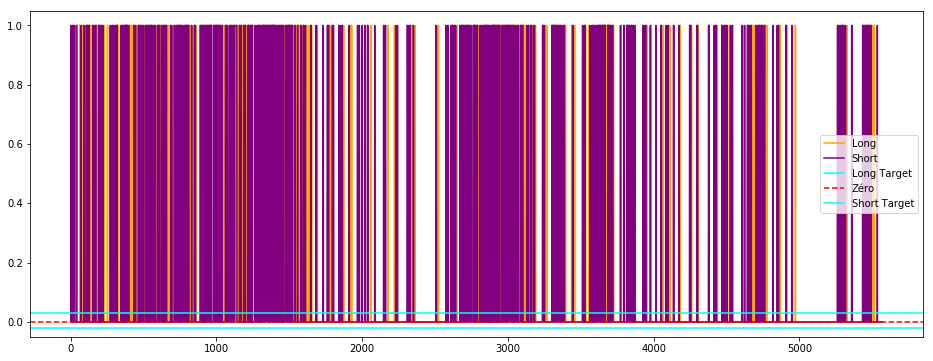

In [13]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Long'],color='orange',label='Long')
plt.plot(var_dtf['Short'],color='purple',label='Short')
plt.axhline(y=long_target, color='cyan',linestyle='-', label='Long Target')
plt.axhline(y=0, color='red',linestyle='--', label='Zéro')
plt.axhline(y=short_target,color='cyan',label='Short Target')
plt.legend()

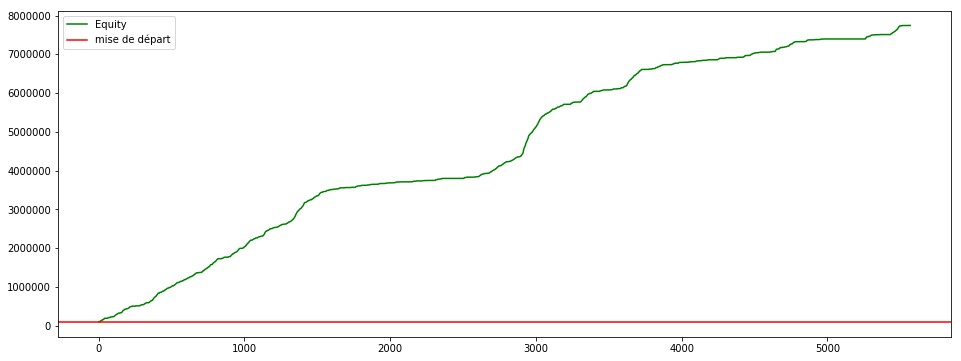

In [14]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [15]:
len(short_list),len(long_list),len(df)

(5569, 5569, 5575)

In [16]:
df = df.iloc[5:(df.shape[0]-1),:]
df['short'] = short_list
df['long'] = long_list

In [17]:
print('Nombre de positions de long trouvées :',sum(long_list))
print('Nombre de positions short trouvées :',sum(short_list))
print('Sur un total de ',sum(short_list)+sum(long_list))

Nombre de positions de long trouvées : 768
Nombre de positions short trouvées : 1100
Sur un total de  1868


In [18]:
print('Sur un achat systématique, les gains représentent',\
      round((sum(short_list)+sum(long_list))/(len(short_list)+len(long_list))*100,2),'%')

Sur un achat systématique, les gains représentent 16.77 %


In [19]:
#df['short'] = df['trend'].shift(-1)

In [20]:
df.tail()

,spy_norm,vix_norm,SPY,short,long
Date,,,,,
2019-04-22,0.000862,0.027295,290.269989,0,0
2019-04-23,0.008992,-0.011272,292.880005,0,0
2019-04-24,-0.002219,0.070033,292.230011,0,0
2019-04-25,-0.000616,0.008371,292.049988,0,0
2019-04-26,0.004657,-0.039245,293.410004,0,0


In [21]:
df = df.dropna()
df.tail()

,spy_norm,vix_norm,SPY,short,long
Date,,,,,
2019-04-22,0.000862,0.027295,290.269989,0,0
2019-04-23,0.008992,-0.011272,292.880005,0,0
2019-04-24,-0.002219,0.070033,292.230011,0,0
2019-04-25,-0.000616,0.008371,292.049988,0,0
2019-04-26,0.004657,-0.039245,293.410004,0,0


In [22]:
df['short'].sum(),df['long'].sum()

(1100, 768)

In [23]:
df.to_csv('dataset_Ruled.csv')